# All imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import sklearn.discriminant_analysis as da
from sklearn.decomposition import PCA
from pylab import *
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, classification_report, f1_score as calculate_f1_score
from sklearn.naive_bayes import GaussianNB

## Step 1 : Explore the data , EDA

In [2]:
# Specifying the path to your .npy file
train_file_path = 'fashion_train.npy'
test_file_path = 'fashion_test.npy'

# Load the data from the .npy file
train_data = np.load(train_file_path)
test_data = np.load(test_file_path)
print(train_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


### 1.1 Plot their means as boxplot

c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\45911\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


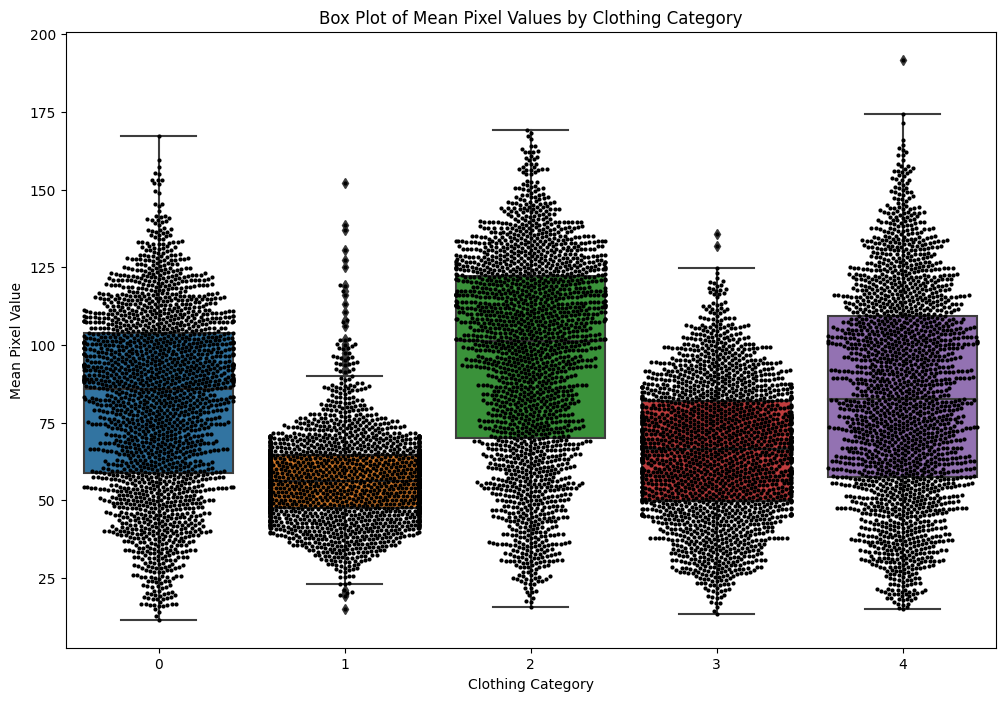

In [3]:
# last column (785) is the category
categories = train_data[:, -1].astype(int)

# The pixel values are in the first 784 columns
pixel_values = train_data[:, :-1]

# Convert pixel values to grayscale images (28x28)
images = pixel_values.reshape(-1, 28, 28)

# Create a DataFrame for Seaborn
df = pd.DataFrame({'Category': categories, 'Mean Pixel Value': pixel_values.mean(axis=1)})

# Create a box plot with Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Mean Pixel Value', data=df)

# Add points for individual data points (optional)
sns.swarmplot(x='Category', y='Mean Pixel Value', data=df, color='black', size=3)

# Show the plot
plt.title('Box Plot of Mean Pixel Values by Clothing Category')
plt.xlabel('Clothing Category')
plt.ylabel('Mean Pixel Value')
plt.show()

## 1.2 Plot their means as histogram

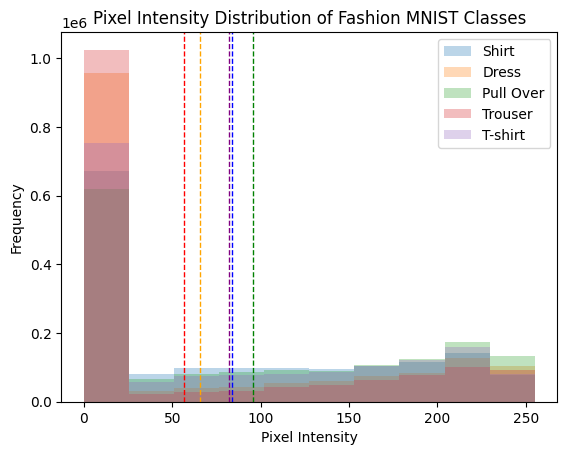

In [4]:
#get list of
t_shirt_list = []
trouser_list = []
pull_over_list = []
dress_list = []
shirt_list = []

#create subset of data with the different classes
for i in range(len(train_data)):
    if train_data[i][-1] == 0:
        t_shirt_list.append(train_data[i])
    elif train_data[i][-1] == 1:
        trouser_list.append(train_data[i])
    elif train_data[i][-1] == 2:
        pull_over_list.append(train_data[i])
    elif train_data[i][-1] == 3:
        dress_list.append(train_data[i])
    elif train_data[i][-1] == 4:
        shirt_list.append(train_data[i])

mu0_tshirts = np.mean(t_shirt_list)
mu1_trousers = np.mean(trouser_list)
mu2_pull_over = np.mean(pull_over_list)
mu3_dress = np.mean(dress_list)
mu4_shirt = np.mean(shirt_list)
concatenated_tshirt = np.concatenate(t_shirt_list)
concatenated_trouser = np.concatenate(trouser_list)
concatenated_pull_over = np.concatenate(pull_over_list)
concatenated_dress = np.concatenate(dress_list)
concatenated_shirt = np.concatenate(shirt_list)

#plot all the histograms on top of eachother

#add transparency
plt.hist(concatenated_shirt, alpha = 0.3)
plt.hist(concatenated_dress, alpha = 0.3)
plt.hist(concatenated_pull_over, alpha = 0.3)
plt.hist(concatenated_trouser, alpha = 0.3)
plt.hist(concatenated_tshirt, alpha = 0.3)
plt.legend(['Shirt', 'Dress', 'Pull Over', 'Trouser', 'T-shirt'])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Fashion MNIST Classes')
#add mu lines
plt.axvline(mu0_tshirts, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(mu1_trousers, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu2_pull_over, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mu3_dress, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mu4_shirt, color='blue', linestyle='dashed', linewidth=1)

## 1.3. Show the Mean images

In [5]:
# Get the data withouth the lables and only get the lables
x = train_data[:, :-1]
y = train_data[:, -1]

In [6]:
# Divide the data into classes

class_tshirt = train_data[train_data[:,-1]==0]
class_tshirt = class_tshirt[:,:-1]


class_trouser = train_data[train_data[:,-1]==1]
class_trouser = class_trouser[:,:-1]

class_pullover = train_data[train_data[:,-1]==2]
class_pullover = class_pullover[:,:-1]

class_dress = train_data[train_data[:,-1]==3]
class_dress = class_dress[:,:-1]


class_shirt = train_data[train_data[:,-1]==4]
class_shirt = class_shirt[:,:-1]

## 1.3.1 Show the mean images per class

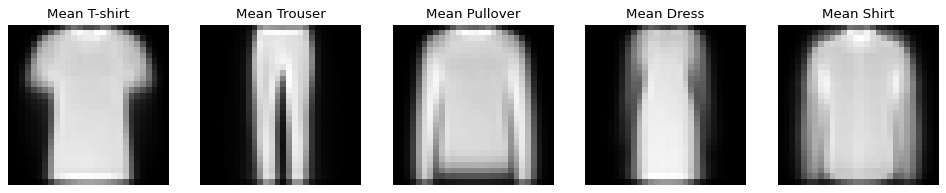

In [7]:
# Calculate the mean of each class, then see how it corresponds to an image
mean_tshirt = np.mean(class_tshirt,axis = 0)
mean_trouser = np.mean(class_trouser,axis = 0)
mean_pullover = np.mean(class_pullover,axis = 0)
mean_dress = np.mean(class_dress,axis = 0)
mean_shirt = np.mean(class_shirt,axis =0)

plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,5,1)
plt.imshow(mean_tshirt.reshape(28,28), cmap='gray')
plt.title('Mean T-shirt')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(mean_trouser.reshape(28,28), cmap='gray')
plt.title('Mean Trouser')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(mean_pullover.reshape(28,28), cmap='gray')
plt.title('Mean Pullover')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(mean_dress.reshape(28,28), cmap='gray')
plt.title('Mean Dress')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(mean_shirt.reshape(28,28), cmap='gray')
plt.title('Mean Shirt')
plt.axis('off')

plt.show()

## Step 2: LDA
## 2.1. Compute Within-Class Scatter Matrix (SW) using the covariance of the transposed classes

In [8]:
# Get the scatter matrix for each class (S_0, S_1, S_2, S_3, S_4)
scatter_tshirt = np.cov(class_tshirt.T)
scatter_trouser = np.cov(class_trouser.T)
scatter_pullover = np.cov(class_pullover.T)
scatter_dress = np.cov(class_dress.T)
scatter_shirt = np.cov(class_shirt.T)


In [9]:
# Calculating S_w -> scatter matrix
S_w = scatter_tshirt + scatter_trouser + scatter_pullover + scatter_dress + scatter_shirt


## 2.2 Get the betweeness scatter matrix Sb

In [10]:
# Get m (global mean)
m = 1/5*(mean_tshirt+mean_trouser+mean_pullover+mean_dress+mean_shirt)
#print(f" This is m {m}")

In [11]:
# betweeness_scatter
S_b= (
len(class_tshirt)*np.outer((mean_tshirt-m),(mean_tshirt-m).T) + 
len(class_trouser)*np.outer((mean_trouser-m),(mean_trouser-m).T)+
len(class_pullover)*np.outer((mean_pullover-m),(mean_pullover-m).T)+ 
len(class_dress)*np.outer((mean_dress-m),(mean_dress-m).T) + 
len(class_shirt)*np.outer((mean_shirt-m),(mean_shirt-m).T)
)

## 2.3 Find the discriminant matrix M

In [12]:
# find M, which is the discriminant matrix  M= S_w(inverse) * S_b
S_W_inv = np.linalg.inv(S_w)
discr_matrix = np.dot(S_W_inv , S_b)


## 2.4. Find and sort the LDA Projection Vectors

In [13]:
eigen_values, eigen_vectors =sc.linalg.eigh(S_b,S_w)

# Create pairs of eigenvalues and eigenvectors
eigen_pairs = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Sort the eigenvalue-eigenvector pairs based on eigenvalues
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the top 2 eigenvalues and corresponding eigenvectors
top_eigenvalues = [eigen_pairs[i][0] for i in range(2)]
top_eigenvectors = [eigen_pairs[i][1] for i in range(2)]

# Convert the lists to numpy arrays if needed
top_eigenvalues = np.array(top_eigenvalues)
top_eigenvectors = np.array(top_eigenvectors)

In [14]:
# Transforming the eigenvectoræs to real numbers
top_eigenvectors_real_nb = np.real(top_eigenvectors)
print(top_eigenvectors_real_nb.shape)
x1 =top_eigenvectors_real_nb[0]
x2 = top_eigenvectors_real_nb[1]
print(x1.shape)
print(x2.shape)



(2, 784)
(784,)
(784,)


### 2.5 Create  a function that applies LDA to a dataset

In [15]:
def apply_lda_to_each_img_in_array(img_array):
    lda_data = [] #create an empty array to store the lda data
    for row in img_array: #for each row in the array
        img_data = row[:-1] #get the img data
        img_label = row[-1] #get the img label

        imgx1 = np.dot(img_data,x1) #apply lda to the img
        imgx2 = np.dot(img_data,x2) #apply lda to the img
        lda_data.append([imgx1,imgx2,img_label]) #append the img data and label to the lda_data array
    lda_data = np.array(lda_data) #convert the array to a numpy array
    return lda_data

### 2.6. Apply LDA from sklearn and make scatterplot

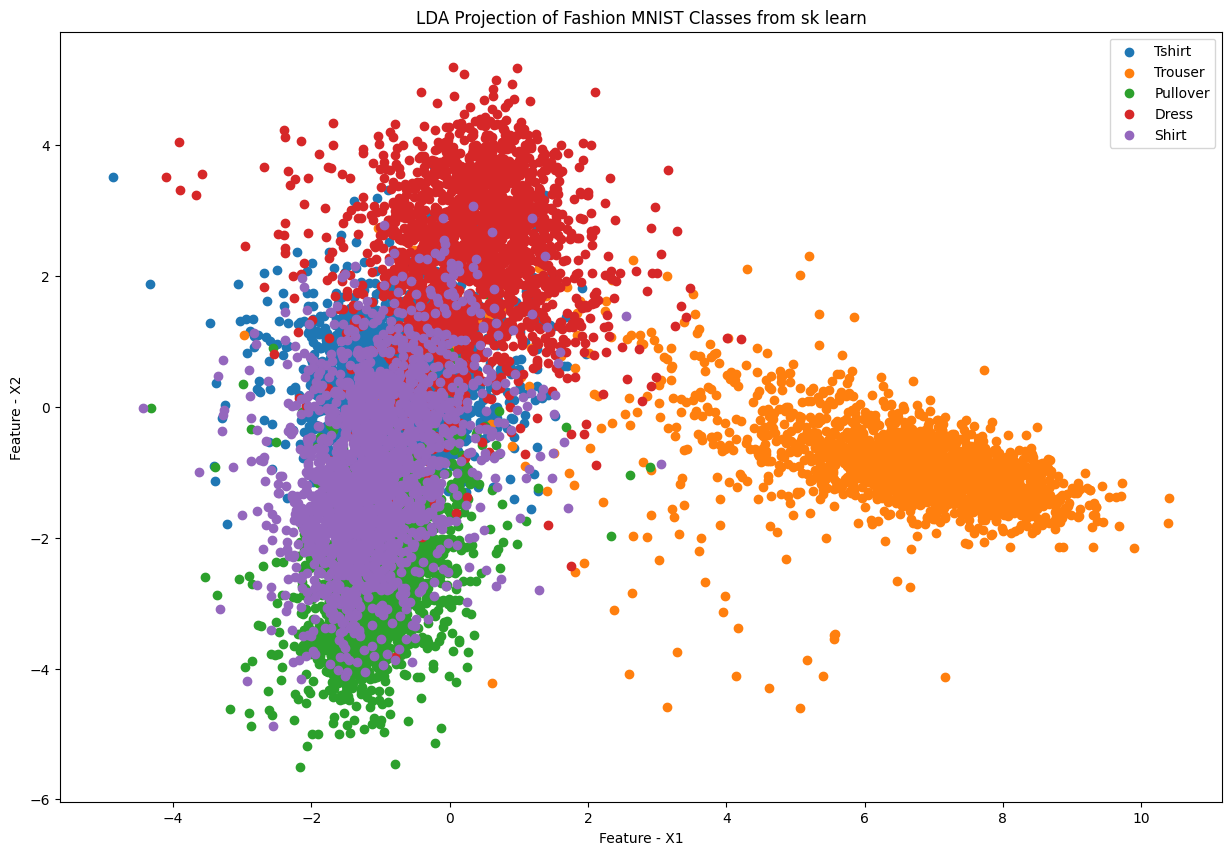

In [16]:
# Add LDA from a library and compare the reuslts
tm = top_eigenvectors_real_nb
new = np.dot(tm,x.T)
final_lda = new.T

lda = da.LinearDiscriminantAnalysis(n_components=2,solver='eigen')
b = lda.fit(x,y)
lda_sklearn_projection = lda.transform(x)

X_r2 = lda.fit(x, y).transform(x)
plt.figure(figsize=(15,10))
#plt.scatter(X_r2[:,0],X_r2[:,1],c=y)

# Scatter plot for class 0
plt.scatter(X_r2[y == 0, 0], X_r2[y == 0, 1], label='Tshirt')

# Scatter plot for class 1
plt.scatter(X_r2[y == 1, 0], X_r2[y == 1, 1], label='Trouser')
# Scatter plot for class 2
plt.scatter(X_r2[y == 2, 0], X_r2[y == 2, 1], label='Pullover')

# Scatter plot for class 3
plt.scatter(X_r2[y == 3, 0], X_r2[y == 3, 1], label='Dress')
# Scatter plot for class 4
plt.scatter(X_r2[y == 4, 0], X_r2[y == 4, 1], label='Shirt')
plt.legend()
plt.title('LDA Projection of Fashion MNIST Classes from sk learn')
plt.xlabel('Feature - X1')
plt.ylabel('Feature - X2')
plt.show()

### 2.7 Compare the results LDA from scratch vs LDA sk learn

Text(0.5, 1.0, 'LDA Projection of Fashion MNIST Classes from scratch')

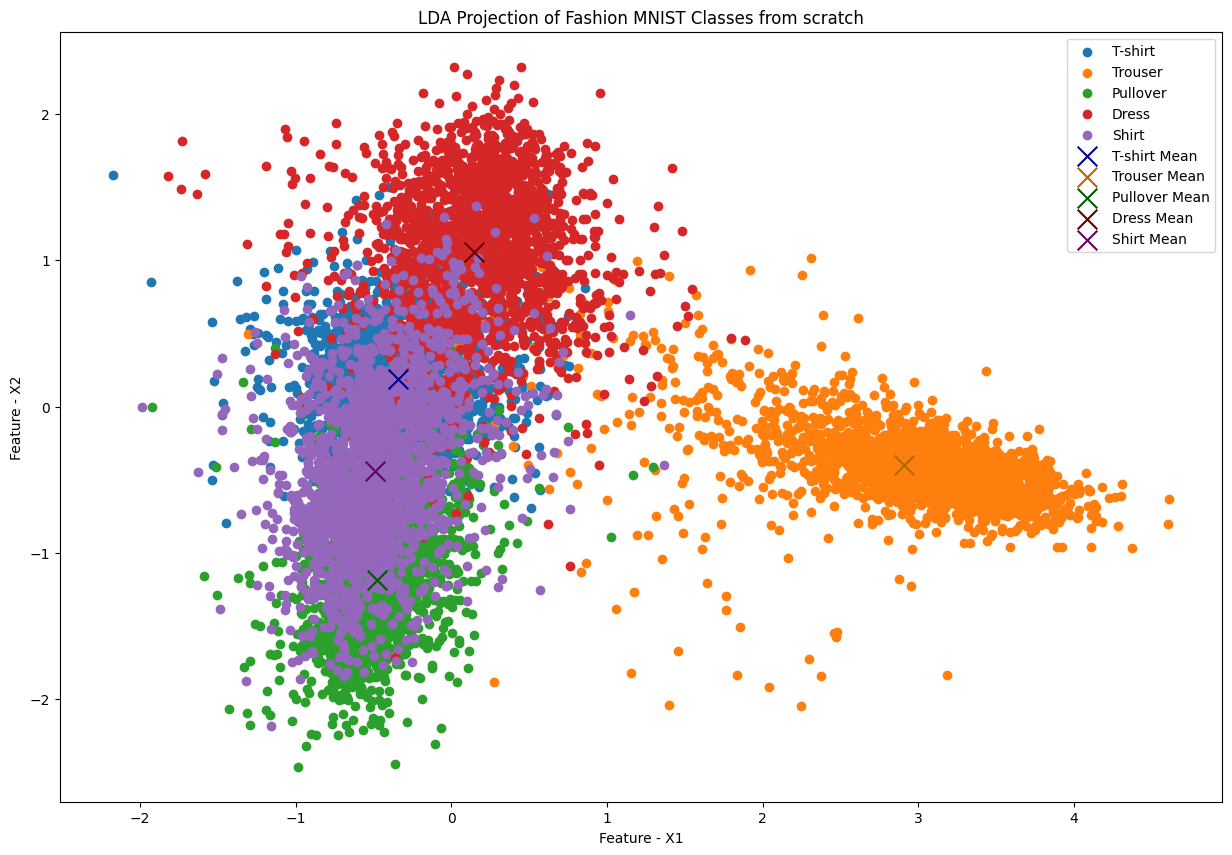

In [17]:
#Do scatter plot for each class to seee how LDA works

plt.figure(figsize=(15, 10))
tshirt_proj_x1 = np.dot(class_tshirt,x1)
tshirt_proj_x2 = np.dot(class_tshirt,x2)
#get the mean of the reduced classes
t_shirt_proj_mean = np.mean(tshirt_proj_x1),np.mean(tshirt_proj_x2)

plt.scatter(tshirt_proj_x1,tshirt_proj_x2, label = 'T-shirt')


trouser_proj_x1 = np.dot(class_trouser,x1)
trouser_proj_x2 = np.dot(class_trouser,x2)
trouser_proj_mean = np.mean(trouser_proj_x1),np.mean(trouser_proj_x2)

plt.scatter(trouser_proj_x1,trouser_proj_x2, label = 'Trouser')


pullover_proj_x1 = np.dot(class_pullover,x1)
pullover_proj_x2 = np.dot(class_pullover,x2)
pullover_proj_mean = np.mean(pullover_proj_x1),np.mean(pullover_proj_x2)

plt.scatter(pullover_proj_x1,pullover_proj_x2, label = 'Pullover')


dress_proj_x1 = np.dot(class_dress,x1)
dress_proj_x2 = np.dot(class_dress,x2)
dress_proj_mean = np.mean(dress_proj_x1),np.mean(dress_proj_x2)

plt.scatter(dress_proj_x1,dress_proj_x2, label = 'Dress')


shirts_proj_x1 = np.dot(class_shirt,x1)
shirts_proj_x2 = np.dot(class_shirt,x2)
shirts_proj_mean = np.mean(shirts_proj_x1),np.mean(shirts_proj_x2)

plt.scatter(shirts_proj_x1,shirts_proj_x2, label = 'Shirt')


#plot the means
plt.scatter(t_shirt_proj_mean[0],t_shirt_proj_mean[1], label = 'T-shirt Mean',marker='x',s=200,c="#00008B")
plt.scatter(trouser_proj_mean[0],trouser_proj_mean[1], label = 'Trouser Mean',marker='x',s=200, c="#b36900")
plt.scatter(pullover_proj_mean[0],pullover_proj_mean[1], label = 'Pullover Mean',marker='x',s=200, c="#005a00")
plt.scatter(dress_proj_mean[0],dress_proj_mean[1], label = 'Dress Mean',marker='x',s=200, c="#610000")
plt.scatter(shirts_proj_mean[0],shirts_proj_mean[1], label = 'Shirt Mean',marker='x',s=200, c="#660066")

plt.xlabel('Feature - X1')
plt.ylabel('Feature - X2')
plt.legend()
plt.title('LDA Projection of Fashion MNIST Classes from scratch')

# 3 Implement PCA with 2 components 

(2,)


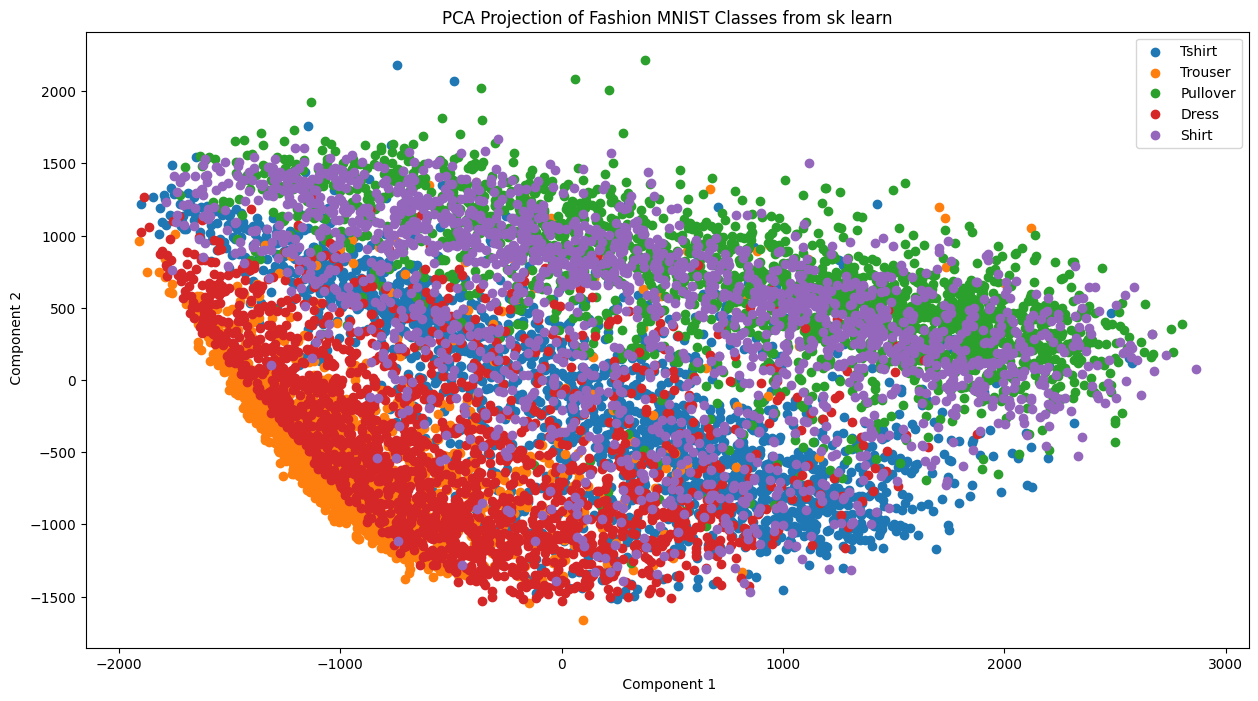

In [18]:
# ADD pca and see which one does a better job maybe
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

print(X_pca[0].shape)

plt.figure(figsize=(15,8))

# Scatter plot for class 0
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Tshirt')

# Scatter plot for class 1
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Trouser')
# Scatter plot for class 2
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], label='Pullover')
plt.title('PCA Projection of Fashion MNIST Classes from sk learn')
# Scatter plot for class 3
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], label='Dress')
# Scatter plot for class 4
plt.scatter(X_pca[y == 4, 0], X_pca[y == 4, 1], label='Shirt')
plt.xlabel(' Component 1')
plt.ylabel(' Component 2')
plt.legend()
plt.show()

# 4 Compare the result PCA vs LDA

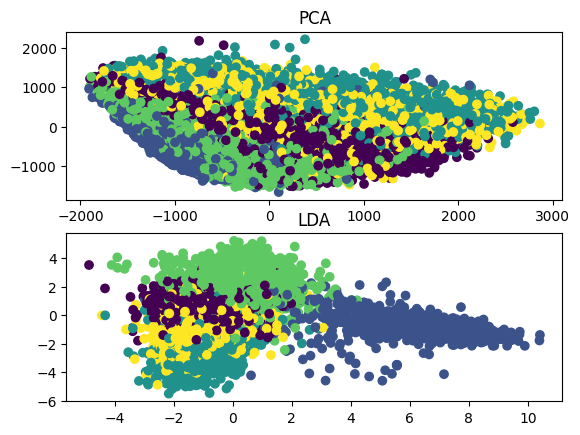

In [19]:
# subploting and title setting
subplot(2,1,1)
title("PCA")
# plotting the pca
plt.scatter(X_pca[:,0],X_pca[:,1], c=y)
# subploting and title
subplot(2,1,2)
title("LDA")
# plotting LDA
plt.scatter(X_r2[:,0],X_r2[:,1], c=y)
plt.show()

# Step 5: Implementing Naive Bayes
## 5.1 Getting the simple probabilities

In [20]:
count_0_tshirt = 0
count_1_trousers = 0
count_2_pull_over = 0
count_3_dress = 0
count_4_shirt = 0
num_rows = 10000



#Loop through the last column
for value in y:
    if value == 0:
        count_0_tshirt += 1
    elif value == 1:
        count_1_trousers += 1
    elif value == 2:
        count_2_pull_over += 1
    elif value == 3:
        count_3_dress += 1
    elif value == 4:
        count_4_shirt += 1

#Get the simple probabilities
P_tshirt = count_0_tshirt / num_rows
P_trouser = count_1_trousers / num_rows
P_pull_over = count_2_pull_over/ num_rows
P_dress = count_3_dress / num_rows
P_shirt = count_4_shirt / num_rows

print(f" P(T-shirt) = {P_tshirt}")
print(f" P(Trousers) = {P_trouser}")
print(f" P(Pull Over) = {P_pull_over}")
print(f" P(Dress) = {P_dress}")
print(f" P(Shirt) = {P_shirt}")

simpprob = {"T_shirt":P_tshirt,"Trouser":P_trouser,"Pull_over":P_pull_over,"Dress":P_dress,"Shirt":P_shirt}

 P(T-shirt) = 0.2033
 P(Trousers) = 0.1947
 P(Pull Over) = 0.2001
 P(Dress) = 0.2005
 P(Shirt) = 0.2014


## 5.2 Calculate the P(X|Y) - the likelihood of observing X given each class by using histograms 

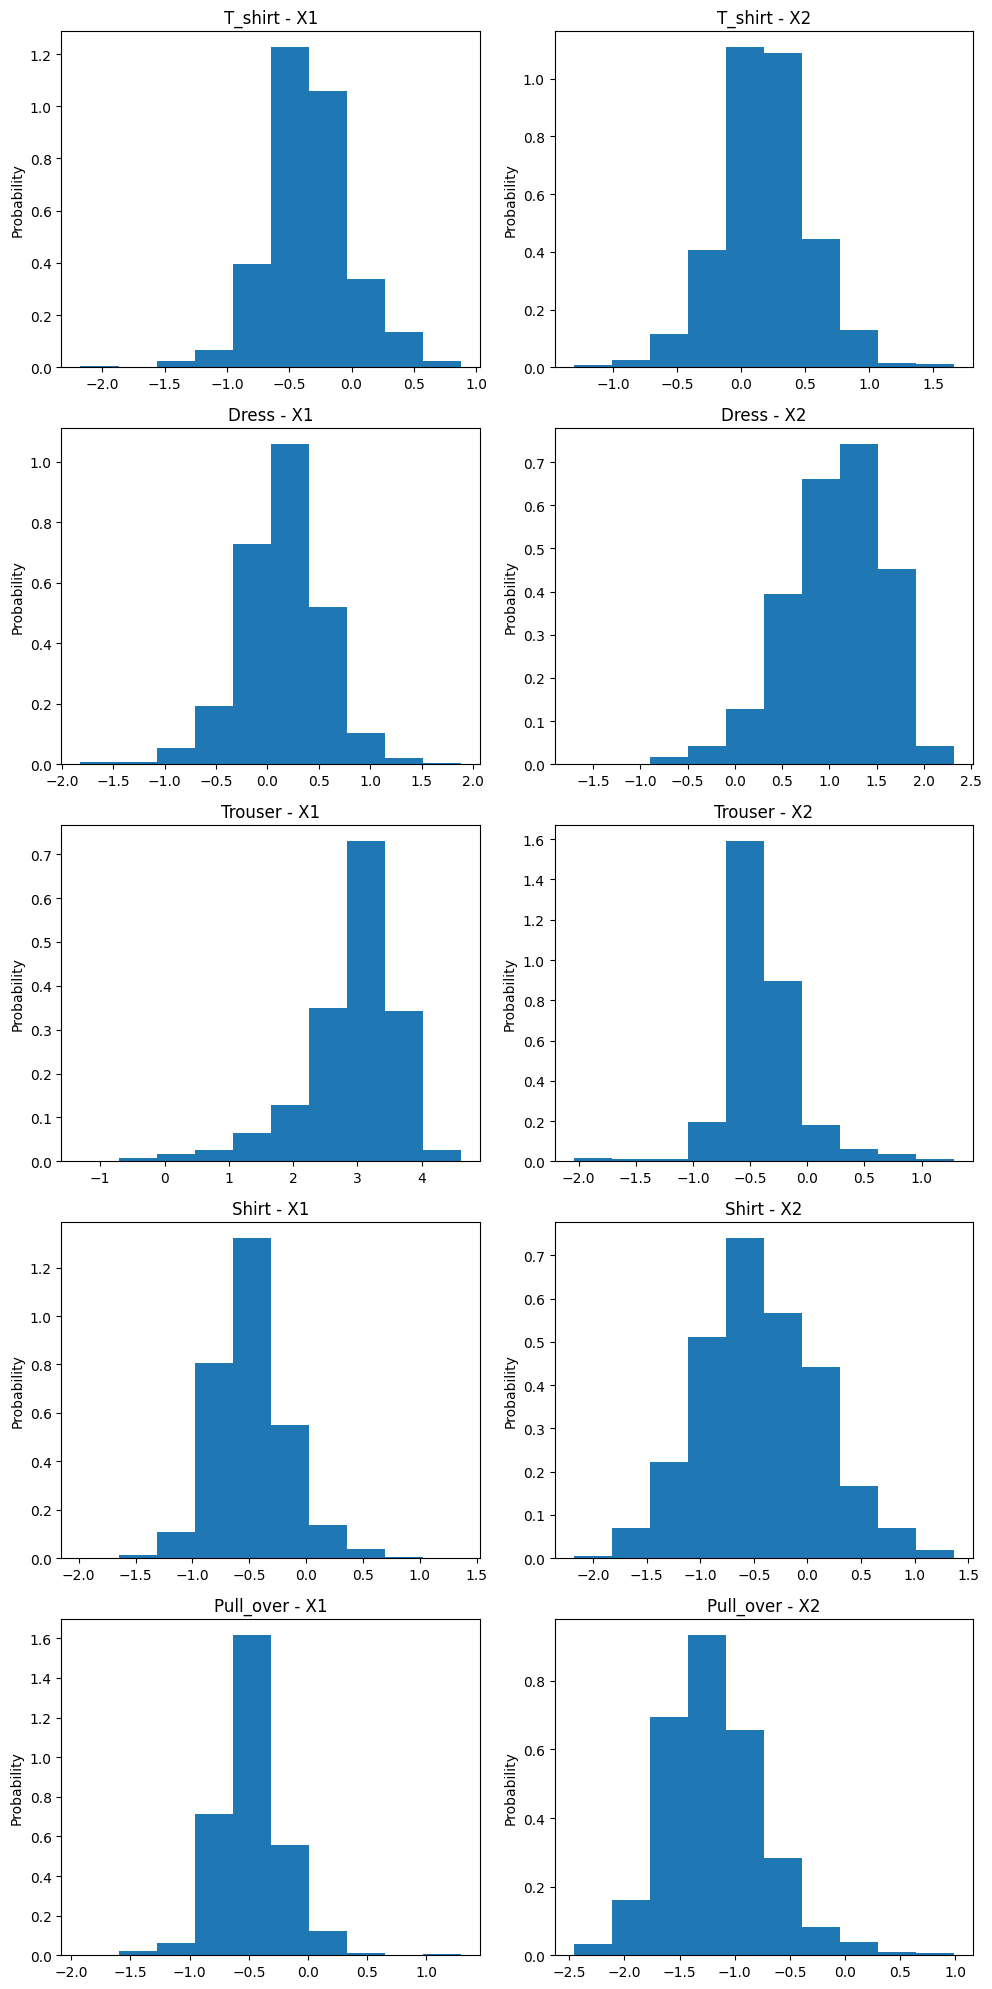

In [21]:
def show_histograms():
    categories = ['T_shirt', 'Dress', 'Trouser', 'Shirt', 'Pull_over']
    x1_data = [tshirt_proj_x1, dress_proj_x1, trouser_proj_x1, shirts_proj_x1, pullover_proj_x1]
    x2_data = [tshirt_proj_x2, dress_proj_x2, trouser_proj_x2, shirts_proj_x2, pullover_proj_x2]
    fig, axs = plt.subplots(5, 2, figsize=(10, 20))

    for i in range(5):
        axs[i, 0].hist(x1_data[i], density=1)
        axs[i, 0].set_title(f'{categories[i]} - X1')
        axs[i, 0].set_ylabel('Probability')
        axs[i, 1].hist(x2_data[i], density=1)
        axs[i, 1].set_title(f'{categories[i]} - X2')
        axs[i, 1].set_ylabel('Probability')
    plt.tight_layout()
    #plt.show()

show_histograms()


## 5.3. Train Naive Bayes

In [22]:
def apply_naive_bayes(feature1, feature2):
    categories = ['T_shirt', 'Dress', 'Trouser', 'Shirt', 'Pull_over']
    x1_data = [tshirt_proj_x1, dress_proj_x1, trouser_proj_x1, shirts_proj_x1, pullover_proj_x1]
    x2_data = [tshirt_proj_x2, dress_proj_x2, trouser_proj_x2, shirts_proj_x2, pullover_proj_x2]
    results = {}

    for i in range(5):
        k,bins = np.histogram(x1_data[i], density=True)
        bin_index = np.digitize(feature1,bins)

        if 0<bin_index<len(bins):
            binprob1 = k[bin_index-1]
        else:
            binprob1 = 0

        k,bins = np.histogram(x2_data[i], density=True)
        bin_index = np.digitize(feature2,bins)

        if 0<bin_index<len(bins):
            binprob2 = k[bin_index-1]
        else:
            binprob2 = 0

        class_simp_prob = simpprob[categories[i]]
        #print(f'probability of {categories[i]}: {class_simp_prob}')

        probabilitet = binprob1*binprob2*class_simp_prob
        #print(probabilitet)

        results[categories[i]] = probabilitet

    #print(results)
    max_key = max(results, key=results.get)
    max_value = results[max_key]
    #plt.tight_layout()
    #plt.show()
    return max_key, max_value

## 5.4. Get metrics and confusion matrix for our Naive Bayes

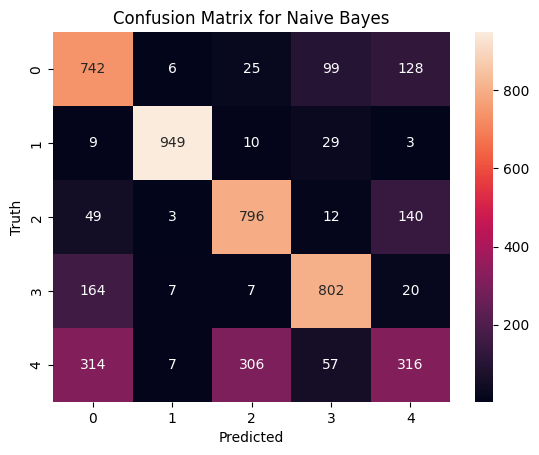

           Precision  Recall  F1 Score  Accuracy
T-shirt     0.580595   0.742  0.651449    0.8412
Trouser     0.976337   0.949  0.962475    0.9852
Pull-over   0.695804   0.796  0.742537    0.8896
Dress       0.802803   0.802  0.802401    0.9210
Shirt       0.520593   0.316  0.393279    0.8050
         Precision  Recall  F1 Score  Accuracy
Average   0.715226   0.721  0.710428    0.8884


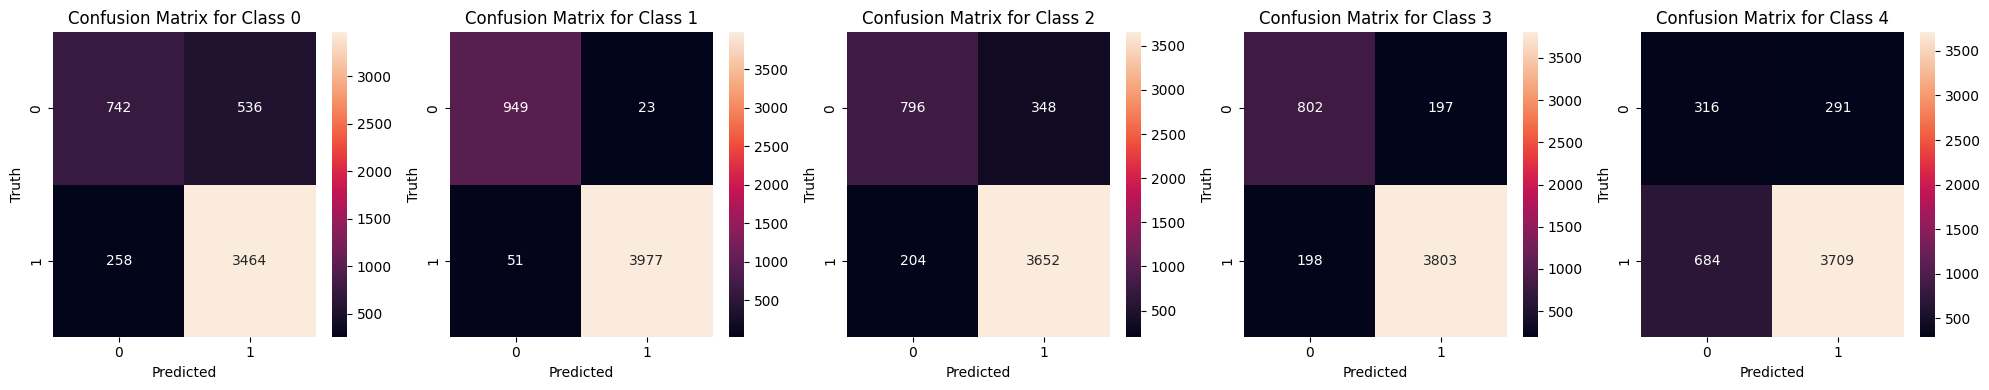

In [23]:
def calculate_confusion_matrix(lda_data_with_label):
    class_dict = {"T_shirt":0,"Trouser":1,"Pull_over":2,"Dress":3,"Shirt":4}
    cfsion_matrix = np.zeros((5,5),dtype=int)
    
    for row in lda_data_with_label:
        feature1 = row[0]
        feature2 = row[1]
        actual_class = row[2]
        predicted_class = class_dict[apply_naive_bayes(feature1,feature2)[0]]
        cfsion_matrix[int(actual_class)][predicted_class] += 1
    return cfsion_matrix

def calculate_metrics_from_cfsion_mtrx(cfsion_matrix):
    precision = []
    recall = []
    f1_scr = []
    accuracy = []
    class_cfsion_matrix = []
    for i in range(5):
        #the diagonals are the true positives
        tp = cfsion_matrix[i][i]
        #the sum of the row is the false positives
        fp = sum(cfsion_matrix[:,i]) - tp
        #the sum of the column is the false negatives
        fn = sum(cfsion_matrix[i,:]) - tp
        #the sum of the matrix is the true negatives, minus the true positives, false positives and false negatives
        tn = sum(sum(cfsion_matrix)) - tp - fp - fn
        class_cfsion_matrix.append([tp,fp,fn,tn])
        #the precision is the true positives divided by the true positives plus the false positives
        precision.append(tp/(tp+fp))
        #the recall is the true positives divided by the true positives plus the false negatives
        recall.append(tp/(tp+fn))
        #the f1 score is the harmonic mean of the precision and recall
        f1_scr.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))
        #the accuracy is the true positives plus the true negatives divided by the true positives, true negatives, false positives and false negatives
        accuracy.append((tp+tn)/(tp+tn+fp+fn))
    return precision, recall, f1_scr, accuracy, class_cfsion_matrix

#visualise the confusion matrix for Naive Bayes with LDA
NB_cfsion_matrix = calculate_confusion_matrix(apply_lda_to_each_img_in_array(test_data))

sns.heatmap(NB_cfsion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

#calculate the metrics for Naive Bayes with LDA
precision_our_NB, recall_our_NB, f1_scr_our_NB,accuracy_our_NB,class_cfsion_matrix_our_NB = calculate_metrics_from_cfsion_mtrx(NB_cfsion_matrix)

#put the values into a dataframe
df_our_NB = pd.DataFrame({'Precision':precision_our_NB,'Recall':recall_our_NB,'F1 Score':f1_scr_our_NB,'Accuracy':accuracy_our_NB},index=['T-shirt','Trouser','Pull-over','Dress','Shirt'])
print(df_our_NB)

#put the average values into a dataframe
df_our_NB_avg = pd.DataFrame({'Precision':np.mean(precision_our_NB),'Recall':np.mean(recall_our_NB),'F1 Score':np.mean(f1_scr_our_NB),'Accuracy':np.mean(accuracy_our_NB)},index=['Average'])
print(df_our_NB_avg)


#visualise the class confusion matrixes
plt.subplots(1,5,figsize=(20, 4))
for i in range(5):
    #use subplot to plot the confusion matrixes
    plt.subplot(1,5,i+1)
    sns.heatmap(np.array(class_cfsion_matrix_our_NB[i]).reshape(2,2), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.tight_layout()
    plt.title(f'Confusion Matrix for Class {i}')
    
plt.tight_layout()
plt.show()




## 5.5 Implement feature reduction on the whole test dataset

In [24]:
test_data_with_lda = apply_lda_to_each_img_in_array(test_data)

## 5.6 Show the effect of the LDA applied to the dataset using a combined histogram and scatterplot

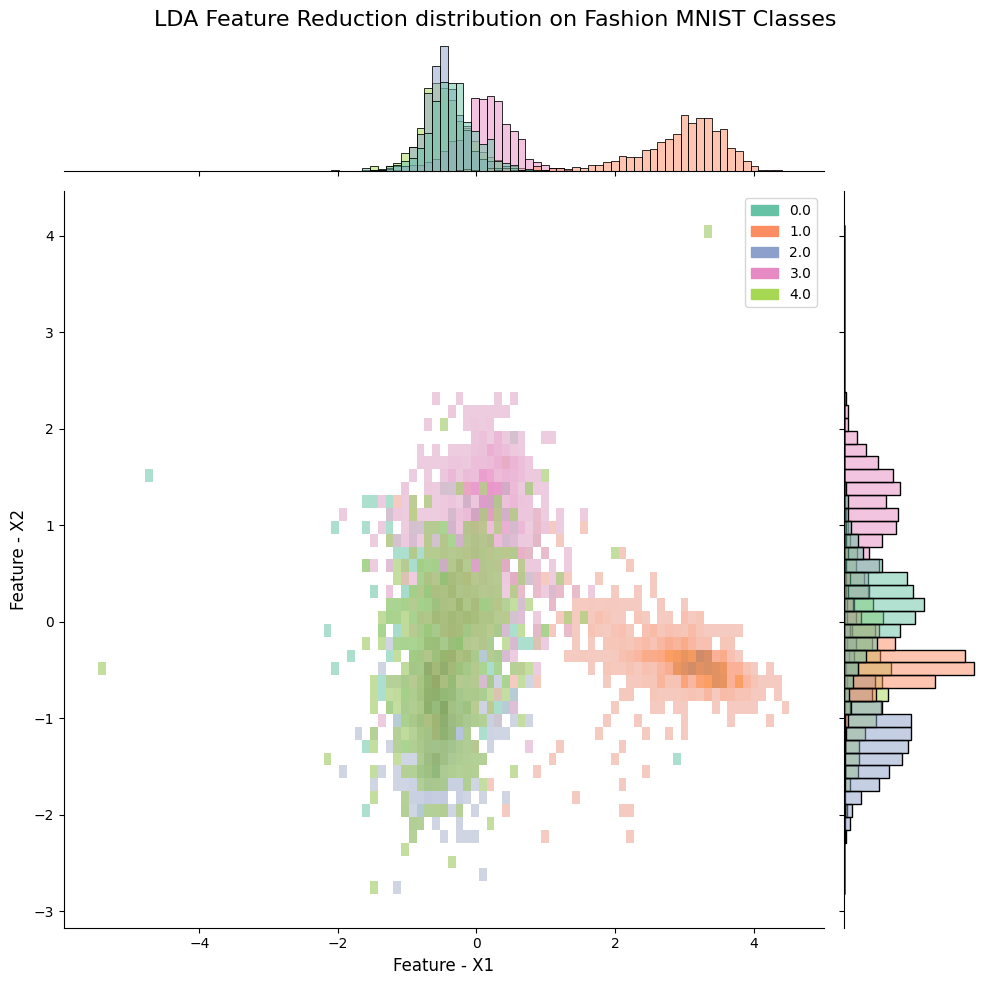

In [25]:
jp = sns.jointplot(x=test_data_with_lda[:,0], y=test_data_with_lda[:,1],height = 10,alpha = 0.7,kind='hist', hue=test_data_with_lda[:,2],palette="Set2",marginal_kws=dict(palette = "Set2", alpha = .5,))
jp.set_axis_labels('Feature - X1', 'Feature - X2', fontsize=12)
jp.fig.suptitle('LDA Feature Reduction distribution on Fashion MNIST Classes', fontsize=16)
jp.fig.tight_layout()
plt.show()

# 6. PCA 100 and LDA 4 features

## 6.1 Load data

In [26]:
# Get the data withouth the lables and only get the lables
x_train_data = train_data[:, :-1]
y_train_data = train_data[:, -1]

x_test_data = test_data[:, :-1]
y_test_data = test_data[:, -1]

## 6.2 Get explained variance and cumulative explained variance for PCA

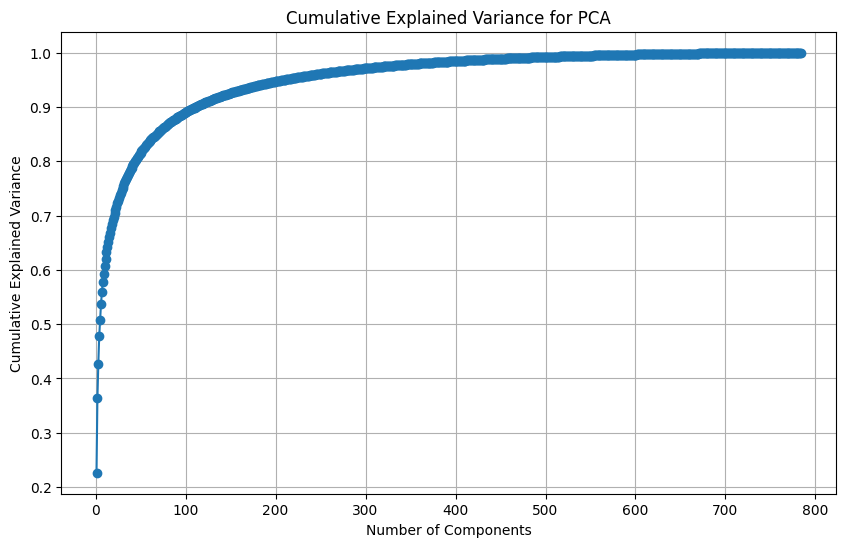

In [27]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train_data)

# Fit PCA and transform the data
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Get explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [28]:
# Take 100 components, because accoring to the graph a 100 explains 90 percent of our data
n_components = 100
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_scaled)

## 6.3 Get explained variance and cumulative explained variance for LDA

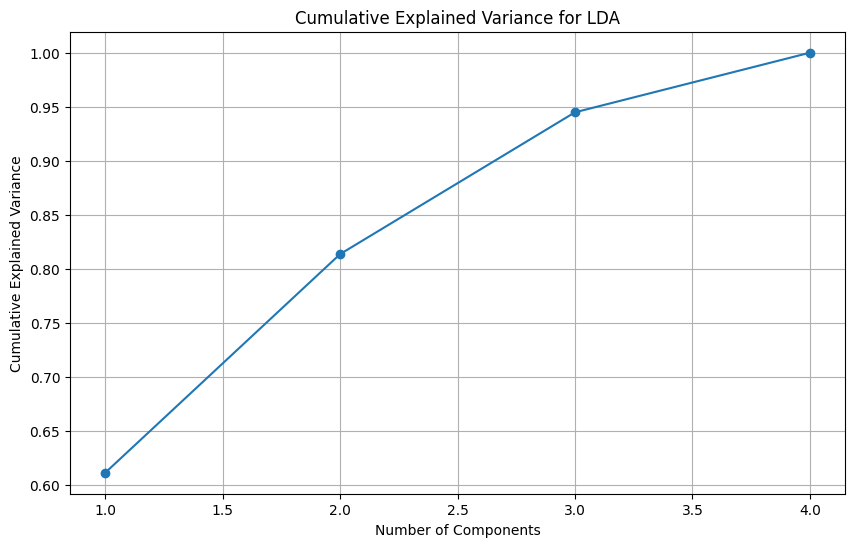

In [29]:
# Fit LDA
lda = LinearDiscriminantAnalysis(n_components=None, solver='eigen')  # Use None to get all components
lda.fit(x_train_data, y_train_data)

# Get explained variance and cumulative explained variance for LDA
explained_variance_ratio_lda = lda.explained_variance_ratio_
cumulative_variance_ratio_lda = np.cumsum(explained_variance_ratio_lda)

# Plot the cumulative explained variance for LDA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio_lda) + 1), cumulative_variance_ratio_lda, marker='o')
plt.title('Cumulative Explained Variance for LDA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Transform the data using LDA
x_lda = lda.transform(x_train_data)


In [30]:
# PCA with 100 components
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_data)
x_test_pca = pca.transform(x_test_data)

## 6.4 Visualize the effects of principal components on an image

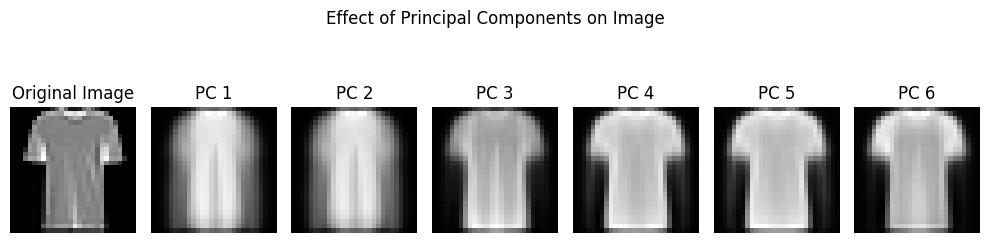

In [31]:

#Visualise the effects of principal components on an image
def visualize_pca_effect(original_image, transformed_images, components):
    plt.figure(figsize=(10, 3))
    
    # Plot the original image
    plt.subplot(1, components + 1, 1)
    plt.imshow(original_image.reshape(28, 28), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot the transformed images along each principal component
    for i in range(1,components+1):
        transformed_image = np.dot(transformed_images[:i], pca.components_[:i, :])
        #add the mean to obtain the actual datapoints, since PCA when applied subtracts the mean.
        transformed_image += pca.mean_
        
        plt.subplot(1, components + 1, i-1 + 2)
        plt.imshow(transformed_image.reshape(28, 28), cmap='gray')
        plt.title(f'PC {i}')
        plt.axis('off')
        
    plt.suptitle('Effect of Principal Components on Image')
    plt.tight_layout()
    plt.show()

# Visualize the effects of the first six principal components
visualize_pca_effect(x_train_data[0], x_train_pca[0, :], 6)

In [32]:
# LDA with 4 components
lda = LinearDiscriminantAnalysis(n_components=4, solver='eigen')
x_train_lda = lda.fit_transform(x_train_data, y_train_data)
x_test_lda = lda.transform(x_test_data)



# 7. Feed 3 other models with the reduced features 

## 7.0 Split the Train data into train and dev data

In [47]:
# Data no PCA, no LDA
# Determine the size of the training and dev sets
train_size_orig = int(0.8 * len(x_train_data))  # 80% of the data for training, adjust as needed
dev_size_orig = len(x_train_data) - train_size_orig  # Remaining data for development

# Splitting the original training data into train and dev sets
x_train_orig_train = x_train_data[:train_size_orig]
y_train_train = y_train_data[:train_size_orig]

x_train_orig_dev = x_train_data[train_size_orig:]
y_train_dev = y_train_data[train_size_orig:]



# PCA with 100 components
pca = PCA(n_components=100)
x_train_pca = pca.fit_transform(x_train_data)
x_test_pca = pca.transform(x_test_data)

train_size = int(0.8 * len(x_train_pca))  # 80% of the data for training, adjust as needed
dev_size = len(x_train_pca) - train_size  # Remaining data for development

# Splitting the training data into train and dev sets
x_train_pca_train = x_train_pca[:train_size]
y_train_train = y_train_data[:train_size]

x_train_pca_dev = x_train_pca[train_size:]
y_train_dev = y_train_data[train_size:]

# LDA with 4 components
lda = LinearDiscriminantAnalysis(n_components=4, solver='eigen')
x_train_lda = lda.fit_transform(x_train_data, y_train_data)
x_test_lda = lda.transform(x_test_data)

# Determine the size of the training and dev sets
train_size_lda = int(0.8 * len(x_train_lda))  # 80% of the data for training, adjust as needed
dev_size_lda = len(x_train_lda) - train_size_lda  # Remaining data for development

# Splitting the LDA transformed training data into train and dev sets
x_train_lda_train = x_train_lda[:train_size_lda]
y_train_train = y_train_data[:train_size_lda]

x_train_lda_dev = x_train_lda[train_size_lda:]
y_train_dev = y_train_data[train_size_lda:]





## 7.1. kNN

### 7.1.1 kNN with no PCA, no LDA

KNN Validation Accuracy with Original Data: 0.836
Classification Report for Development Data:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       423
           1       0.99      0.97      0.98       390
           2       0.80      0.85      0.83       384
           3       0.91      0.85      0.88       430
           4       0.70      0.65      0.68       373

    accuracy                           0.84      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000

Cross-Validation Accuracy with Original Data: 0.8304
Cross-Validation F1 Score with Original Data: 0.8292
Cross-Validation Classification Report with Original Data:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2033
           1       0.99      0.96      0.97      1947
           2       0.81      0.85      0.83      2001
           3       0.91      0.88  

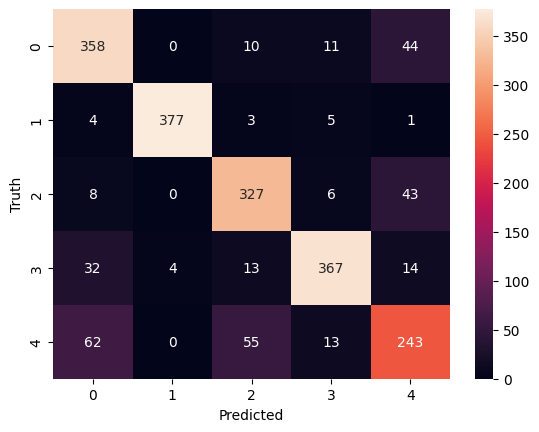

In [49]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_orig_train, y_train_train)

# Make predictions on the development data
knn_dev_predictions = knn.predict(x_train_orig_dev)

# Calculate accuracy on the development data
knn_dev_accuracy = accuracy_score(y_train_dev, knn_dev_predictions)
print(f'KNN Validation Accuracy with Original Data: {knn_dev_accuracy}')

# Confusion matrix and heatmap for the development data
cm_knn_dev = confusion_matrix(y_train_dev, knn_dev_predictions)
sns.heatmap(cm_knn_dev, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, and F1 score for the development data
precision_dev, recall_dev, f1_score_dev, _ = precision_recall_fscore_support(y_train_dev, knn_dev_predictions, average='weighted')

print("Classification Report for Development Data:")
print(classification_report(y_train_dev, knn_dev_predictions))

# Perform cross-validation for accuracy on the original data
cv_accuracy_orig = cross_val_score(knn, x_train_data, y_train_data, cv=5, scoring=make_scorer(accuracy_score))
print(f'Cross-Validation Accuracy with Original Data: {np.mean(cv_accuracy_orig):.4f}')

# Perform cross-validation for F1 score on the original data
cv_predictions_orig = cross_val_predict(knn, x_train_data, y_train_data, cv=5)
cv_f1_orig = calculate_f1_score(y_train_data, cv_predictions_orig, average='weighted')
print(f'Cross-Validation F1 Score with Original Data: {cv_f1_orig:.4f}')

# Print the classification report for cross-validation on the original data
cv_report_orig = classification_report(y_train_data, cv_predictions_orig)
print("Cross-Validation Classification Report with Original Data:")
print(cv_report_orig)

### 7.1.2 PCA kNN

PCA KNN Validation Accuracy with Dev Data: 0.834
Classification Report for Development PCA Data:
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       423
           1       0.99      0.97      0.98       390
           2       0.81      0.83      0.82       384
           3       0.92      0.86      0.89       430
           4       0.67      0.65      0.66       373

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000

Cross-Validation Accuracy with PCA Data: 0.8374
Cross-Validation F1 Score with PCA Data: 0.8366
Cross-Validation Classification Report with PCA Data:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      2033
           1       0.99      0.96      0.98      1947
           2       0.83      0.85      0.84      2001
           3       0.91      0.89      0.90    

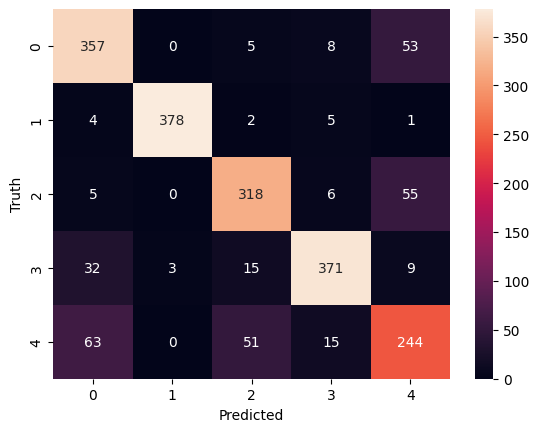

In [50]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_pca_train, y_train_train)

# Make predictions on the development PCA data
knn_dev_predictions = knn.predict(x_train_pca_dev)

# Calculate accuracy on the development PCA data
knn_dev_accuracy = accuracy_score(y_train_dev, knn_dev_predictions)
print(f'PCA KNN Validation Accuracy with Dev Data: {knn_dev_accuracy}')

# Confusion matrix and heatmap for the development PCA data
cm_knn_dev = confusion_matrix(y_train_dev, knn_dev_predictions)
sns.heatmap(cm_knn_dev, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, and F1 score for the development PCA data
precision_dev, recall_dev, f1_score_dev, _ = precision_recall_fscore_support(y_train_dev, knn_dev_predictions, average='weighted')

print("Classification Report for Development PCA Data:")
print(classification_report(y_train_dev, knn_dev_predictions))

# Perform cross-validation for accuracy on the PCA training data
cv_accuracy_pca = cross_val_score(knn, x_train_pca, y_train_data, cv=5, scoring=make_scorer(accuracy_score))
print(f'Cross-Validation Accuracy with PCA Data: {np.mean(cv_accuracy_pca):.4f}')

# Perform cross-validation for F1 score on the PCA training data
cv_predictions_pca = cross_val_predict(knn, x_train_pca, y_train_data, cv=5)
cv_f1_pca = calculate_f1_score(y_train_data, cv_predictions_pca, average='weighted')
print(f'Cross-Validation F1 Score with PCA Data: {cv_f1_pca:.4f}')

# Print the classification report for cross-validation on the PCA training data
cv_report_pca = classification_report(y_train_data, cv_predictions_pca)
print("Cross-Validation Classification Report with PCA Data:")
print(cv_report_pca)


### 7.1.3. LDA kNN

LDA KNN Validation Accuracy with Dev Data: 0.863
Classification Report for Development LDA Data:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       423
           1       0.99      0.98      0.99       390
           2       0.85      0.88      0.86       384
           3       0.90      0.90      0.90       430
           4       0.75      0.70      0.73       373

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

Cross-Validation Accuracy with LDA Data: 0.8616
Cross-Validation F1 Score with LDA Data: 0.8603
Cross-Validation Classification Report with LDA Data:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2033
           1       0.99      0.97      0.98      1947
           2       0.86      0.89      0.87      2001
           3       0.87      0.90      0.89    

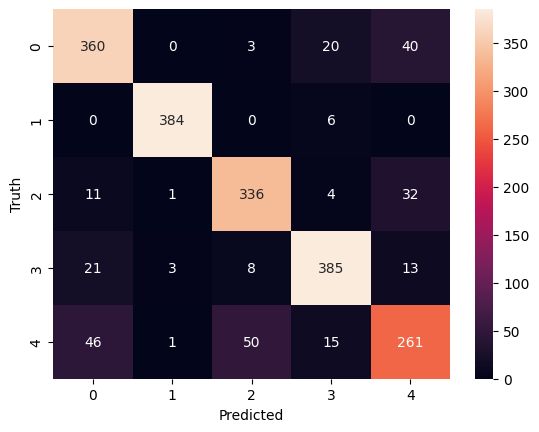

In [51]:
# Create and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(x_train_lda_train, y_train_train)

# Make predictions on the development LDA data
knn_dev_predictions = knn.predict(x_train_lda_dev)

# Calculate accuracy on the development LDA data
knn_dev_accuracy = accuracy_score(y_train_dev, knn_dev_predictions)
print(f'LDA KNN Validation Accuracy with Dev Data: {knn_dev_accuracy}')

# Confusion matrix and heatmap for the development LDA data
cm_knn_dev = confusion_matrix(y_train_dev, knn_dev_predictions)
sns.heatmap(cm_knn_dev, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, and F1 score for the development LDA data
precision_dev, recall_dev, f1_score_dev, _ = precision_recall_fscore_support(y_train_dev, knn_dev_predictions, average='weighted')

print("Classification Report for Development LDA Data:")
print(classification_report(y_train_dev, knn_dev_predictions))

# Perform cross-validation for accuracy on the LDA training data
cv_accuracy_lda = cross_val_score(knn, x_train_lda, y_train_data, cv=5, scoring=make_scorer(accuracy_score))
print(f'Cross-Validation Accuracy with LDA Data: {np.mean(cv_accuracy_lda):.4f}')

# Perform cross-validation for F1 score on the LDA training data
cv_predictions_lda = cross_val_predict(knn, x_train_lda, y_train_data, cv=5)
cv_f1_lda = calculate_f1_score(y_train_data, cv_predictions_lda, average='weighted')
print(f'Cross-Validation F1 Score with LDA Data: {cv_f1_lda:.4f}')

# Print the classification report for cross-validation on the LDA training data
cv_report_lda = classification_report(y_train_data, cv_predictions_lda)
print("Cross-Validation Classification Report with LDA Data:")
print(cv_report_lda)


### 7.1.4. Tuning the parameters of kNN PCA to improve the performance 

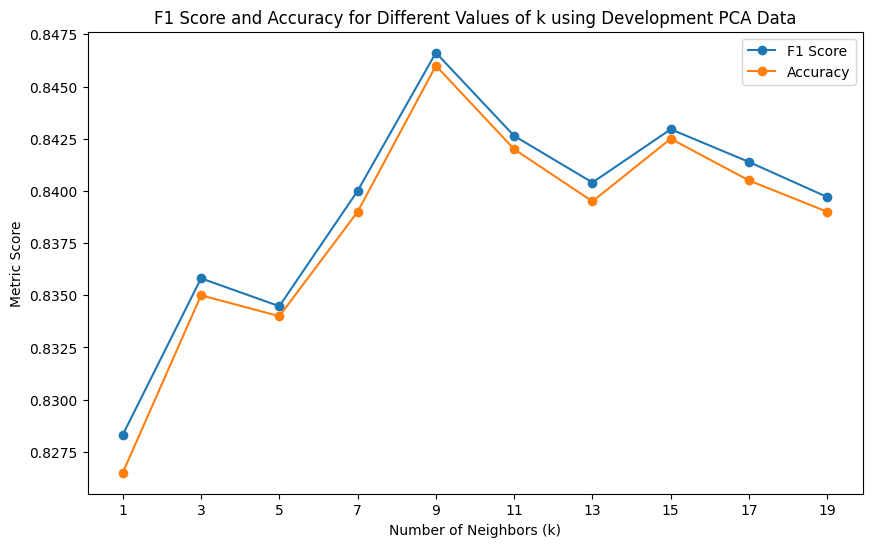

In [52]:
# Define a range of odd k values
k_values = range(1, 20, 2)  

# Lists to store F1 scores and accuracies
f1_scores = []
accuracies = []

# Evaluate k-NN for each value of k using the development PCA data
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca_train, y_train_train)
    knn_predictions = knn.predict(x_train_pca_dev)
    
    # Calculate F1 score and accuracy
    f1_score_value = calculate_f1_score(y_train_dev, knn_predictions, average='weighted')
    accuracy = accuracy_score(y_train_dev, knn_predictions)
    
    f1_scores.append(f1_score_value)
    accuracies.append(accuracy)

# Plot the F1 scores and accuracies for different values of k
plt.figure(figsize=(10, 6))
plt.plot(list(map(int, k_values)), f1_scores, marker='o', label='F1 Score')
plt.plot(list(map(int, k_values)), accuracies, marker='o', label='Accuracy')
plt.title('F1 Score and Accuracy for Different Values of k using Development PCA Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metric Score')
plt.xticks(np.arange(min(k_values), max(k_values)+1, 2))  # Set odd integer ticks on the x-axis
plt.legend()
plt.show()


KNN Validation Accuracy with Test PCA Data (n_neighbors=9): 0.8258
Classification Report for Test PCA Data:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.80      0.84      0.82      1000
           3       0.90      0.89      0.90      1000
           4       0.67      0.61      0.64      1000

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



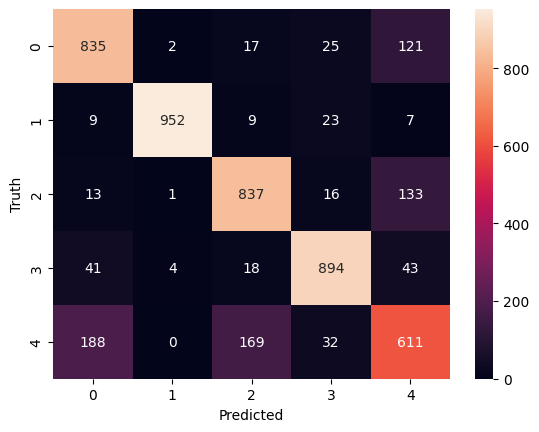

In [54]:
#7.1.5 Test the model when n=9

# Set n_neighbors value
n_neighbors = 9

# Create and train the KNN classifier with n_neighbors=9
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train_pca_train, y_train_train)

# Make predictions on the test PCA data
knn_test_predictions = knn.predict(x_test_pca)

# Calculate accuracy on the test PCA data
knn_test_accuracy = accuracy_score(y_test_data, knn_test_predictions)
print(f'KNN Validation Accuracy with Test PCA Data (n_neighbors={n_neighbors}): {knn_test_accuracy}')

# Confusion matrix and heatmap for the test PCA data
cm_knn_test = confusion_matrix(y_test_data, knn_test_predictions)
sns.heatmap(cm_knn_test, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, and F1 score for the test PCA data
precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y_test_data, knn_test_predictions, average='weighted')

print("Classification Report for Test PCA Data:")
print(classification_report(y_test_data, knn_test_predictions))



## 7.2 Decison Trees

### 7.2.1 Decision Tree no LDA, no PCA

Decision Tree Validation Accuracy with Dev Original Data: 0.7845
Classification Report for Development Original Data:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       423
           1       0.95      0.96      0.95       390
           2       0.80      0.80      0.80       384
           3       0.87      0.81      0.84       430
           4       0.57      0.64      0.60       373

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.79      2000

Cross-Validation Accuracy with Original Data: 0.7825
Cross-Validation F1 Score with Original Data: 0.7838
Cross-Validation Classification Report with Original Data:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2033
           1       0.95      0.95      0.95      1947
           2       0.79      0.80      0.80      2001
           

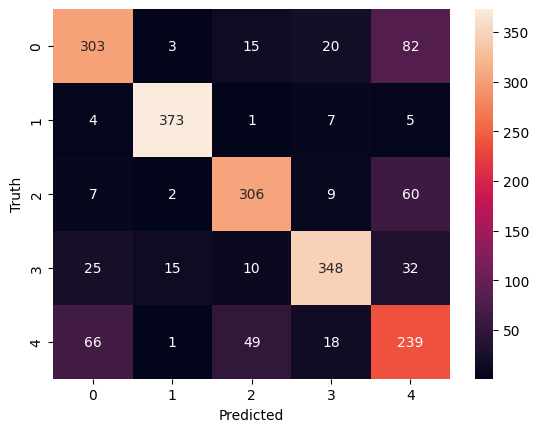

In [55]:
# Create and train the Decision Tree classifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_orig_train, y_train_train)

# Make predictions on the development original data
dt_dev_predictions = dt.predict(x_train_orig_dev)

# Calculate accuracy on the development original data
dt_dev_accuracy = accuracy_score(y_train_dev, dt_dev_predictions)
print(f'Decision Tree Validation Accuracy with Dev Original Data: {dt_dev_accuracy}')

# Confusion matrix and heatmap for the development original data
cm_dt_dev = confusion_matrix(y_train_dev, dt_dev_predictions)
sns.heatmap(cm_dt_dev, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, and F1 score for the development original data
precision_dev, recall_dev, f1_score_dev, _ = precision_recall_fscore_support(y_train_dev, dt_dev_predictions, average='weighted')

print("Classification Report for Development Original Data:")
print(classification_report(y_train_dev, dt_dev_predictions))

# Perform cross-validation
# Cross-validation for accuracy
cv_accuracy_orig = cross_val_score(dt, x_train_data, y_train_data, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy with Original Data: {np.mean(cv_accuracy_orig):.4f}')

# Cross-validation for F1 score
cv_predictions_orig = cross_val_predict(dt, x_train_data, y_train_data, cv=5)
precision_orig, recall_orig, f1_score_orig, _ = precision_recall_fscore_support(y_train_data, cv_predictions_orig, average='weighted')
print(f'Cross-Validation F1 Score with Original Data: {f1_score_orig:.4f}')

# Print the classification report for cross-validation
cv_report_orig = classification_report(y_train_data, cv_predictions_orig)
print("Cross-Validation Classification Report with Original Data:")
print(cv_report_orig)


### 7.2.2. Decision Tree with PCA

Decision Tree Validation Accuracy with PCA Dev Data: 0.7555
19
Classification Report for PCA Dev Data:
              precision    recall  f1-score   support

           0       0.75      0.70      0.73       423
           1       0.93      0.94      0.93       390
           2       0.74      0.75      0.74       384
           3       0.81      0.80      0.80       430
           4       0.55      0.58      0.56       373

    accuracy                           0.76      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.76      0.76      0.76      2000

Cross-Validation Accuracy with PCA Data: 0.7485
Cross-Validation F1 Score with PCA Data: 0.7469
Cross-Validation Classification Report with PCA Data:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2033
           1       0.93      0.93      0.93      1947
           2       0.74      0.74      0.74      2001
           3       0.80      0.80      0.

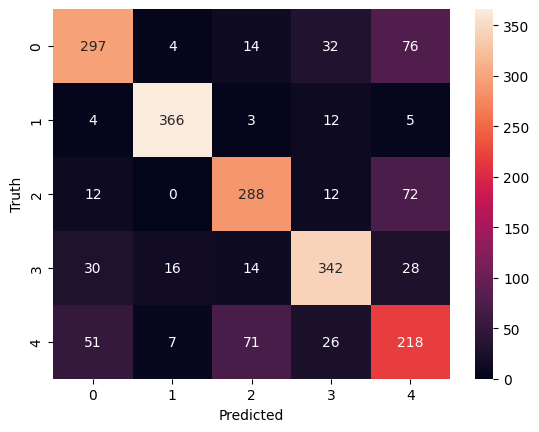

In [56]:
# Create and train the Decision Tree classifier with PCA data
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_pca_train, y_train_train)

# Make predictions on the development PCA data
dt_dev_predictions = dt.predict(x_train_pca_dev)

# Calculate accuracy on the development PCA data
dt_dev_accuracy = accuracy_score(y_train_dev, dt_dev_predictions)
print(f'Decision Tree Validation Accuracy with PCA Dev Data: {dt_dev_accuracy}')
print(dt.tree_.max_depth)

# Confusion matrix and heatmap for the development PCA data
cm_dt_dev = confusion_matrix(y_train_dev, dt_dev_predictions)
sns.heatmap(cm_dt_dev, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate precision, recall, and F1 score for the development PCA data
precision_dev, recall_dev, f1_score_dev, _ = precision_recall_fscore_support(y_train_dev, dt_dev_predictions, average='weighted')

print("Classification Report for PCA Dev Data:")
print(classification_report(y_train_dev, dt_dev_predictions))

# Cross-validation for accuracy on the PCA training data
cv_accuracy_pca = cross_val_score(dt, x_train_pca, y_train_data, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy with PCA Data: {np.mean(cv_accuracy_pca):.4f}')

# Cross-validation for F1 score on the PCA training data
cv_predictions_pca = cross_val_predict(dt, x_train_pca, y_train_data, cv=5)
precision_pca, recall_pca, f1_score_pca, _ = precision_recall_fscore_support(y_train_data, cv_predictions_pca, average='weighted')
print(f'Cross-Validation F1 Score with PCA Data: {f1_score_pca:.4f}')

# Print the classification report for cross-validation on the PCA training data
cv_report_pca = classification_report(y_train_data, cv_predictions_pca)
print("Cross-Validation Classification Report with PCA Data:")
print(cv_report_pca)


### 7.2.3. Decision Tree with LDA

Decision Tree Validation Accuracy with LDA Dev Data: 0.8265
Actual Depth of the Decision Tree: 23


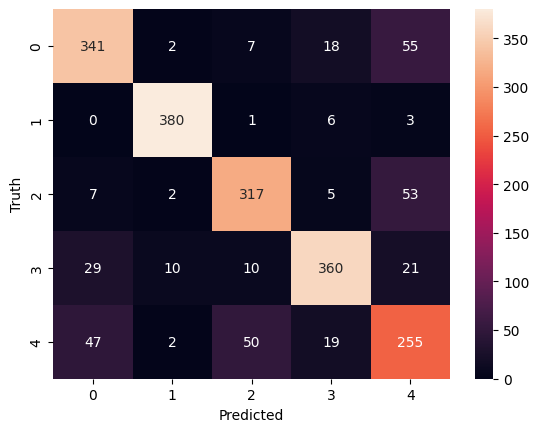

Classification Report for LDA Dev Data:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       423
           1       0.96      0.97      0.97       390
           2       0.82      0.83      0.82       384
           3       0.88      0.84      0.86       430
           4       0.66      0.68      0.67       373

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Cross-Validation Accuracy with LDA Data: 0.8130
Cross-Validation F1 Score with LDA Data: 0.8144
Cross-Validation Classification Report with LDA Data:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2033
           1       0.97      0.97      0.97      1947
           2       0.82      0.82      0.82      2001
           3       0.85      0.84      0.84      2005
           4       0.66      0.67      0.66      2

In [57]:
# Create and train the Decision Tree classifier with LDA data
dt = DecisionTreeClassifier(criterion='entropy', max_depth=25)
dt.fit(x_train_lda_train, y_train_train)

# Make predictions on the development LDA data
dt_dev_predictions = dt.predict(x_train_lda_dev)

# Calculate accuracy on the development LDA data
dt_dev_accuracy = accuracy_score(y_train_dev, dt_dev_predictions)
print(f'Decision Tree Validation Accuracy with LDA Dev Data: {dt_dev_accuracy}')

# Access the depth of the decision tree
depth = dt.tree_.max_depth
print(f"Actual Depth of the Decision Tree: {depth}")

# Confusion matrix and heatmap for the development LDA data
cm_dt_dev = confusion_matrix(y_train_dev, dt_dev_predictions)
sns.heatmap(cm_dt_dev, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate precision, recall, and F1 score for the development LDA data
precision_dev, recall_dev, f1_score_dev, _ = precision_recall_fscore_support(y_train_dev, dt_dev_predictions, average='weighted')

print("Classification Report for LDA Dev Data:")
print(classification_report(y_train_dev, dt_dev_predictions))

# Cross-validation for accuracy on the LDA training data
cv_accuracy_lda = cross_val_score(dt, x_train_lda, y_train_data, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy with LDA Data: {np.mean(cv_accuracy_lda):.4f}')

# Cross-validation for F1 score on the LDA training data
cv_predictions_lda = cross_val_predict(dt, x_train_lda, y_train_data, cv=5)
precision_lda, recall_lda, f1_score_lda, _ = precision_recall_fscore_support(y_train_data, cv_predictions_lda, average='weighted')
print(f'Cross-Validation F1 Score with LDA Data: {f1_score_lda:.4f}')

# Print the classification report for cross-validation on the LDA training data
cv_report_lda = classification_report(y_train_data, cv_predictions_lda)
print("Cross-Validation Classification Report with LDA Data:")
print(cv_report_lda)


# Access the hyperparameters
depth = dt.tree_.max_depth
min_samples_split = dt.get_params()['min_samples_split']
min_samples_leaf = dt.get_params()['min_samples_leaf']

print(f"Actual Depth of the Decision Tree: {depth}")
print(f'Min Samples Split: {min_samples_split}')
print(f'Min Samples Leaf: {min_samples_leaf}')


## Trying to find the best combination of parameters 

In [58]:
# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 5, 10, 15, 20]  
}

# Create the DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the development LDA data
grid_search.fit(x_train_lda_train, y_train_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_dt = DecisionTreeClassifier(**best_params)
best_dt.fit(x_train_lda_train, y_train_train)

# Make predictions on the development LDA data
best_dt_dev_predictions = best_dt.predict(x_train_lda_dev)

# Evaluate the performance of the model on the development LDA data
best_dt_dev_accuracy = accuracy_score(y_train_dev, best_dt_dev_predictions)
print(f'LDA Decision Tree Validation Accuracy with Grid Search: {best_dt_dev_accuracy}')

# Calculate precision, recall, and F1 score for the best model on the development LDA data
precision_dev, recall_dev, f1_score_dev, _ = precision_recall_fscore_support(y_train_dev, best_dt_dev_predictions, average='weighted')
print(f'Precision: {precision_dev:.4f}')
print(f'Recall: {recall_dev:.4f}')
print(f'F1 Score: {f1_score_dev:.4f}')

# Get the maximum depth of the best decision tree model
max_depth = best_params['max_depth']
print(f'Maximum Depth of the Best Decision Tree Model: {max_depth}')


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
LDA Decision Tree Validation Accuracy with Grid Search: 0.8675
Precision: 0.8671
Recall: 0.8675
F1 Score: 0.8671
Maximum Depth of the Best Decision Tree Model: 5


In [59]:
# Look at the performance of the new model with these parameters
# Define the parameters
dt_params = {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10,'criterion': 'entropy'}

# Create the DecisionTreeClassifier with specified parameters
dt_classifier = DecisionTreeClassifier(**dt_params)

# Fit the model on the training data
dt_classifier.fit(x_train_lda_train, y_train_train)

# Make predictions on the development LDA data
dt_dev_predictions = dt_classifier.predict(x_train_lda_dev)

# Evaluate the performance on the development set
dev_accuracy = accuracy_score(y_train_dev, dt_dev_predictions)
dev_f1_score = calculate_f1_score(y_train_dev, dt_dev_predictions, average='weighted')

print(f'Dev Accuracy: {dev_accuracy:.4f}')
print(f'Dev F1 Score: {dev_f1_score:.4f}')

# Perform cross-validation and get accuracy and F1 score on the development LDA data
cv_accuracy = cross_val_score(dt_classifier, x_train_lda, y_train_data, cv=5, scoring='accuracy').mean()
cv_f1_score = cross_val_score(dt_classifier, x_train_lda, y_train_data, cv=5, scoring='f1_weighted').mean()

print(f'Cross-validated Accuracy on LDA Dev Data: {cv_accuracy:.4f}')
print(f'Cross-validated F1 Score on LDA Dev Data: {cv_f1_score:.4f}')



Dev Accuracy: 0.8700
Dev F1 Score: 0.8679
Cross-validated Accuracy on LDA Dev Data: 0.8623
Cross-validated F1 Score on LDA Dev Data: 0.8595


In [60]:
## Test the model  on the test data with the found parameters

# Make predictions on the test LDA data
dt_test_predictions = dt_classifier.predict(x_test_lda)

# Evaluate the performance on the test data
test_accuracy = accuracy_score(y_test_data, dt_test_predictions)
test_f1_score = calculate_f1_score(y_test_data, dt_test_predictions, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test F1 Score: {test_f1_score:.4f}')


Test Accuracy: 0.8068
Test F1 Score: 0.8033


# 8 Assess the correctness of our NB through comparison with sklearn NB

LDA NB Validation Accuracy: 0.723


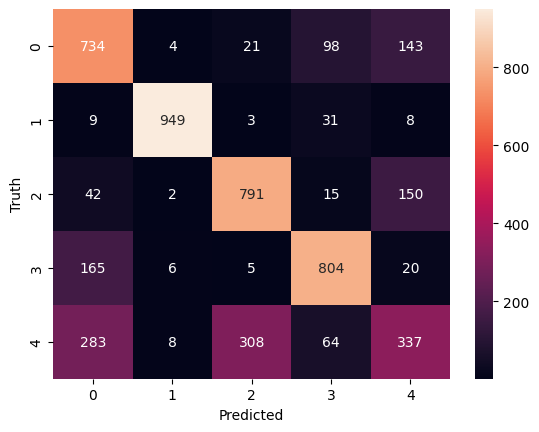

           Precision  Recall  F1 Score  Accuracy
T-shirt     0.595296   0.734  0.657412    0.8470
Trouser     0.979360   0.949  0.963941    0.9858
Pull-over   0.701241   0.791  0.743421    0.8908
Dress       0.794466   0.804  0.799205    0.9192
Shirt       0.512158   0.337  0.406514    0.8032
         Precision  Recall  F1 Score  Accuracy
Average   0.716504   0.723  0.714098    0.8892
           Precision  Recall  F1 Score  Accuracy
T-shirt     0.014701  -0.008  0.005963    0.0058
Trouser     0.003023   0.000  0.001466    0.0006
Pull-over   0.005437  -0.005  0.000884    0.0012
Dress      -0.008336   0.002 -0.003196   -0.0018
Shirt      -0.008435   0.021  0.013234   -0.0018
         Precision  Recall  F1 Score  Accuracy
Average   0.001278   0.002   0.00367    0.0008


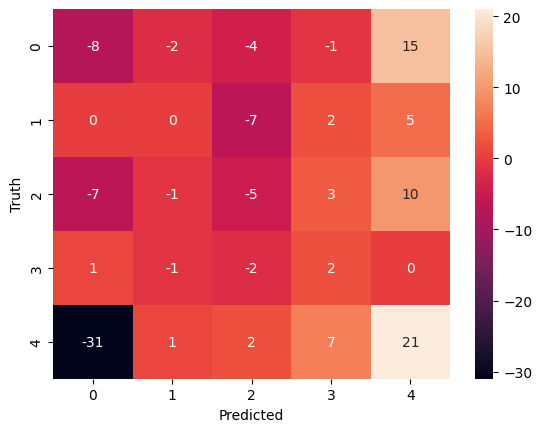

In [44]:
#assess correctness of our NB
train_data_wlda = apply_lda_to_each_img_in_array(train_data)
test_data_wlda = apply_lda_to_each_img_in_array(test_data)

lda_test_x = test_data_wlda[:, :-1]
lda_test_y = test_data_wlda[:, -1]
lda_train_x = train_data_wlda[:, :-1]
lda_train_y = train_data_wlda[:, -1]
#lda_train_x = scaler.fit_transform(lda_train_x)
#lda_test_x = scaler.transform(lda_test_x)
# Create and train the KNN classifier
skNB = GaussianNB()
skNB.fit(lda_train_x, lda_train_y)

# Make predictions on the test data
skNB_predictions = skNB.predict(lda_test_x)

# Calculate accuracy
skNB_accuracy = accuracy_score(lda_test_y, skNB_predictions)
print(f'LDA NB Validation Accuracy: {skNB_accuracy}')

# Confusion matrix and heatmap
skNB_cm = confusion_matrix(lda_test_y, skNB_predictions)
sns.heatmap(skNB_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#calculate the metrics for Naive Bayes with LDA
precision_sklearn_NB, recall_sklearn_nb, f1_scr_sklearn_NB,accuracy_sklearn_NB,class_cfsion_matrix_sklearn_NB = calculate_metrics_from_cfsion_mtrx(skNB_cm)

#put the values into a dataframe
df_sklearn_NB = pd.DataFrame({'Precision':precision_sklearn_NB,'Recall':recall_sklearn_nb,'F1 Score':f1_scr_sklearn_NB,'Accuracy':accuracy_sklearn_NB},index=['T-shirt','Trouser','Pull-over','Dress','Shirt'])
print(df_sklearn_NB)

#put the average values into a dataframe
df_sklearn_NB_avg = pd.DataFrame({'Precision':np.mean(precision_sklearn_NB),'Recall':np.mean(recall_sklearn_nb),'F1 Score':np.mean(f1_scr_sklearn_NB),'Accuracy':np.mean(accuracy_sklearn_NB)},index=['Average'])
print(df_sklearn_NB_avg)

#compare the metrics with the metrics of our NB
df_sklearn_NB_avg['Precision'] = df_sklearn_NB_avg['Precision'] - df_our_NB_avg['Precision']
df_sklearn_NB_avg['Recall'] = df_sklearn_NB_avg['Recall'] - df_our_NB_avg['Recall']
df_sklearn_NB_avg['F1 Score'] = df_sklearn_NB_avg['F1 Score'] - df_our_NB_avg['F1 Score']
df_sklearn_NB_avg['Accuracy'] = df_sklearn_NB_avg['Accuracy'] - df_our_NB_avg['Accuracy']
df_sklearn_NB['Precision'] = df_sklearn_NB['Precision'] - df_our_NB['Precision']
df_sklearn_NB['Recall'] = df_sklearn_NB['Recall'] - df_our_NB['Recall']
df_sklearn_NB['F1 Score'] = df_sklearn_NB['F1 Score'] - df_our_NB['F1 Score']
df_sklearn_NB['Accuracy'] = df_sklearn_NB['Accuracy'] - df_our_NB['Accuracy']
print(df_sklearn_NB)
print(df_sklearn_NB_avg)
dif_conf_cm = skNB_cm - NB_cfsion_matrix
sns.heatmap(dif_conf_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()